# EDA Student Performance Indicator

## 1) Problem Statement
- This project aims to understand how a student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch, and Test preparation course.

## 2) Data Collection
- **Dataset Source** - [Kaggle Dataset](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)
- The data consists of **8 columns** and **1000 rows**.

## 3) Dataset Information
- **gender** : sex of students → (Male/Female)  
- **race/ethnicity** : ethnicity of students → (Group A, B, C, D, E)  
- **parental level of education** : parents' final education → (bachelor's degree, some college, master's degree, associate's degree, high school)  
- **lunch** : having lunch before test (standard or free/reduced)  
- **test preparation course** : complete or not complete before test  
- **math score**  
- **reading score**  
- **writing score**  

### 3) Dataset Information

- **gender** : sex of students → (Male/Female)  
- **race/ethnicity** : ethnicity of students → (Group A, B, C, D, E)  
- **parental level of education** : parents' final education → (bachelor's degree, some college, master's degree, associate's degree, high school)  
- **lunch** : having lunch before test (standard or free/reduced)  
- **test preparation course** : complete or not complete before test  
- **math score**  
- **reading score**  
- **writing score**  


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df = df.rename(columns={'race/ethnicity': 'race_ethnicity'})
df.head()

,gender,race_ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
# segregate numerical and categorical features
# numerical_features = ['math score', 'reading score', 'writing score']
# categorical_features = ['gender', 'race_ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# print("Numerical Features:", numerical_features)
# print("Categorical Features:", categorical_features)


In [ ]:
[ feature for feature in df.columns if df[feature].dtype != 'o']


In [ ]:

numerical_features = []
for feature in df.columns:
    if df[feature].dtype != 'o':
        numerical_features.append(feature)


In [13]:
numerical_features

['gender',
 'race_ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

'reading score'

In [15]:
caegorical_features = []
for feature in df.columns:
    if df[feature].dtype == 'o':
        numerical_features.append(feature)

In [16]:
caegorical_features

[]

In [20]:
numerical_features=[ feature for feature in df.columns if df[feature].dtype != 'o']
categorical_features=[ feature for feature in df.columns if df[feature].dtype == 'o']

In [21]:
categorical_features

[]

In [22]:
# Numerical features (columns with numeric data types)
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Categorical features (columns with object data types)
cat_features = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:", num_features)
print("Categorical Features:", cat_features)


Numerical Features: ['math score', 'reading score', 'writing score']
Categorical Features: ['gender', 'race_ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [23]:

num_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cat_features = [col for col in df.columns if df[col].dtype == 'object']

print("Numerical Features:", num_features)
print("Categorical Features:", cat_features)


Numerical Features: ['math score', 'reading score', 'writing score']
Categorical Features: ['gender', 'race_ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [24]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [25]:
df['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [28]:
## Avg average
df['total_score']=(df['math score']+df['reading score']+df['writing score'])
df['average']=df['total_score']/3
df[['math score', 'reading score', 'writing score', 'total_score', 'average']].head()

,math score,reading score,writing score,total_score,average
0,72,72,74,218,72.666667
1,69,90,88,247,82.333333
2,90,95,93,278,92.666667
3,47,57,44,148,49.333333
4,76,78,75,229,76.333333


<Axes: xlabel='average', ylabel='Count'>

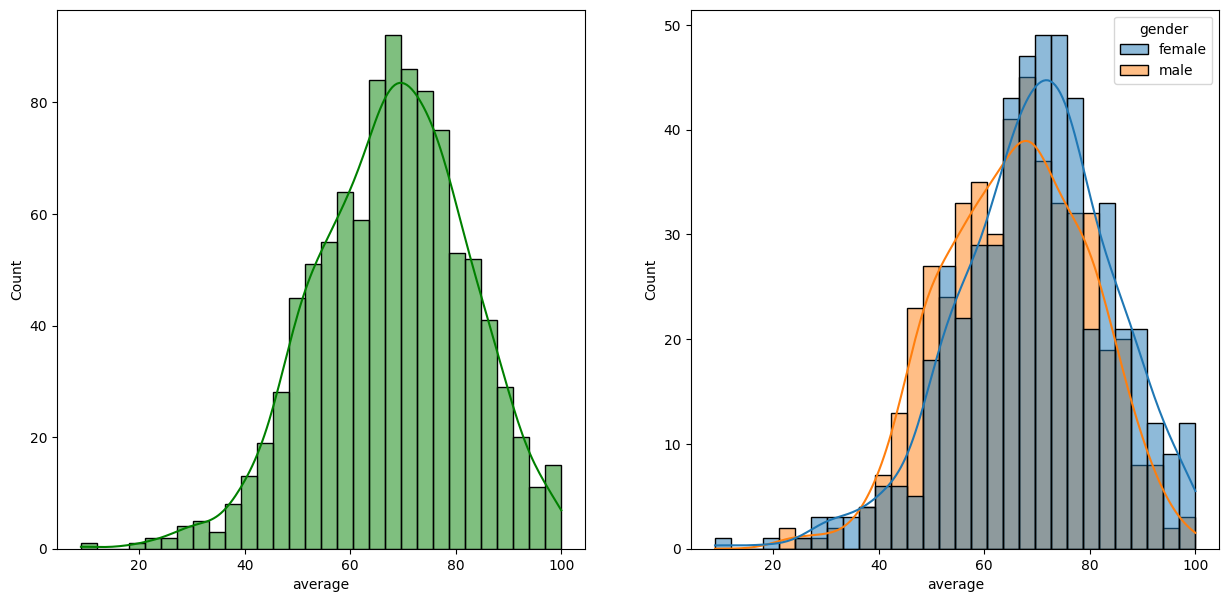

In [31]:
fig, axis = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='gender')

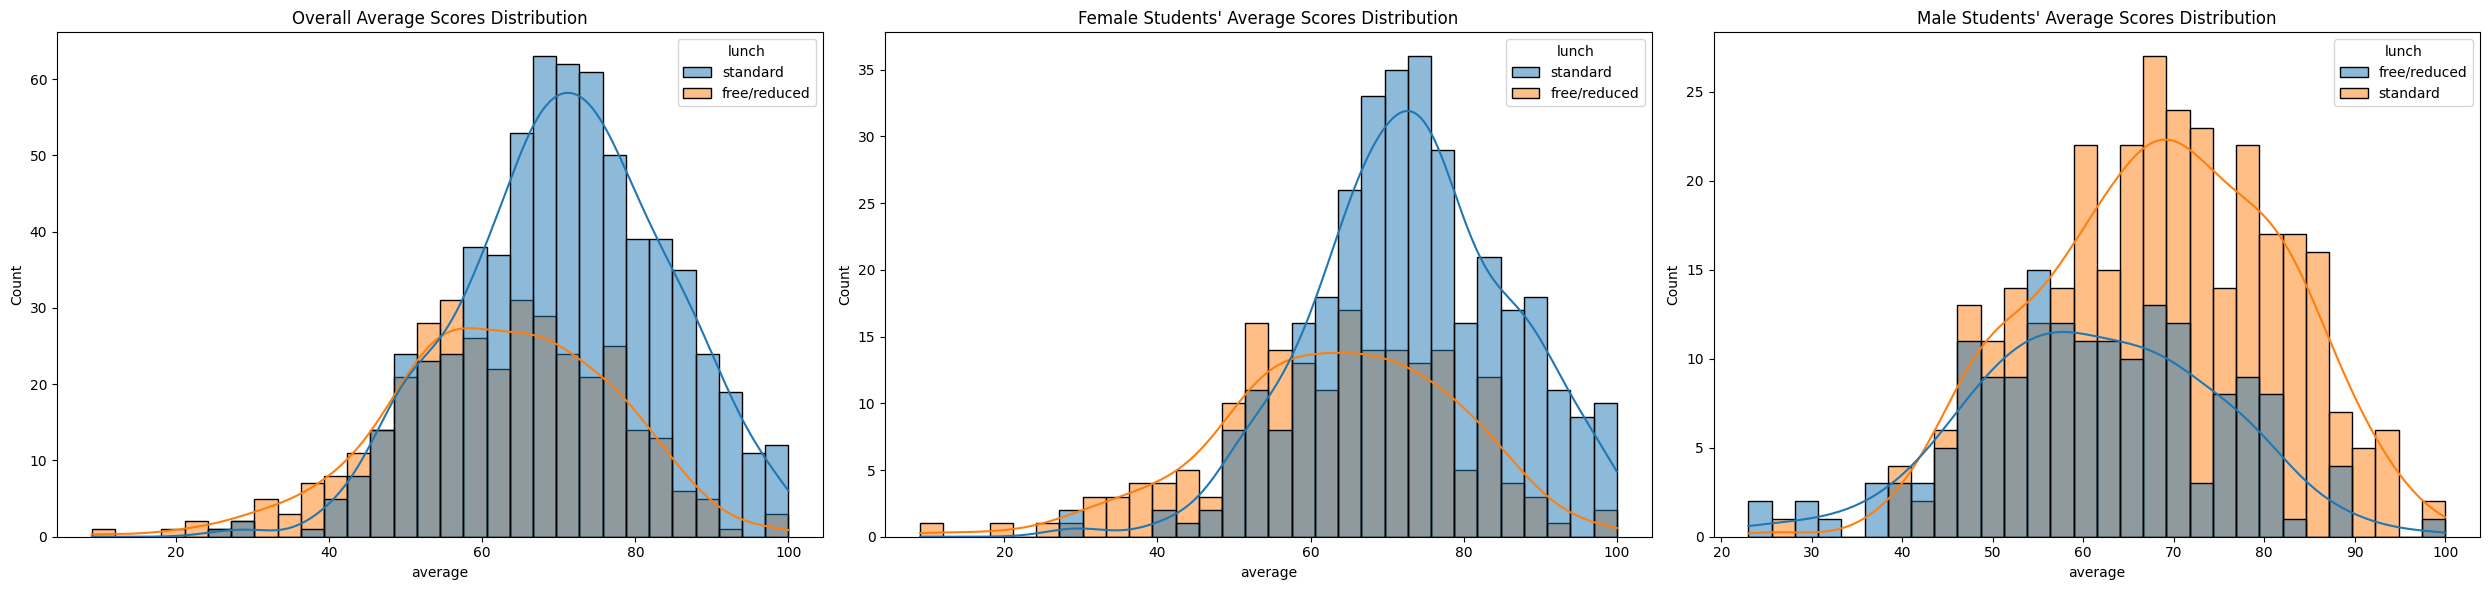

In [35]:

fig, axis = plt.subplots(1, 3, figsize=(25, 6))  # 1 row, 3 columns of subplots

# First subplot: Overall average scores
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', hue='lunch', ax=axis[0])
axis[0].set_title("Overall Average Scores Distribution")

# Second subplot: Female students
sns.histplot(data=df[df.gender == 'female'], x='average', bins=30, kde=True, hue='lunch', ax=axis[1])
axis[1].set_title("Female Students' Average Scores Distribution")

# Third subplot: Male students
sns.histplot(data=df[df.gender == 'male'], x='average', bins=30, kde=True, hue='lunch', ax=axis[2])
axis[2].set_title("Male Students' Average Scores Distribution")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


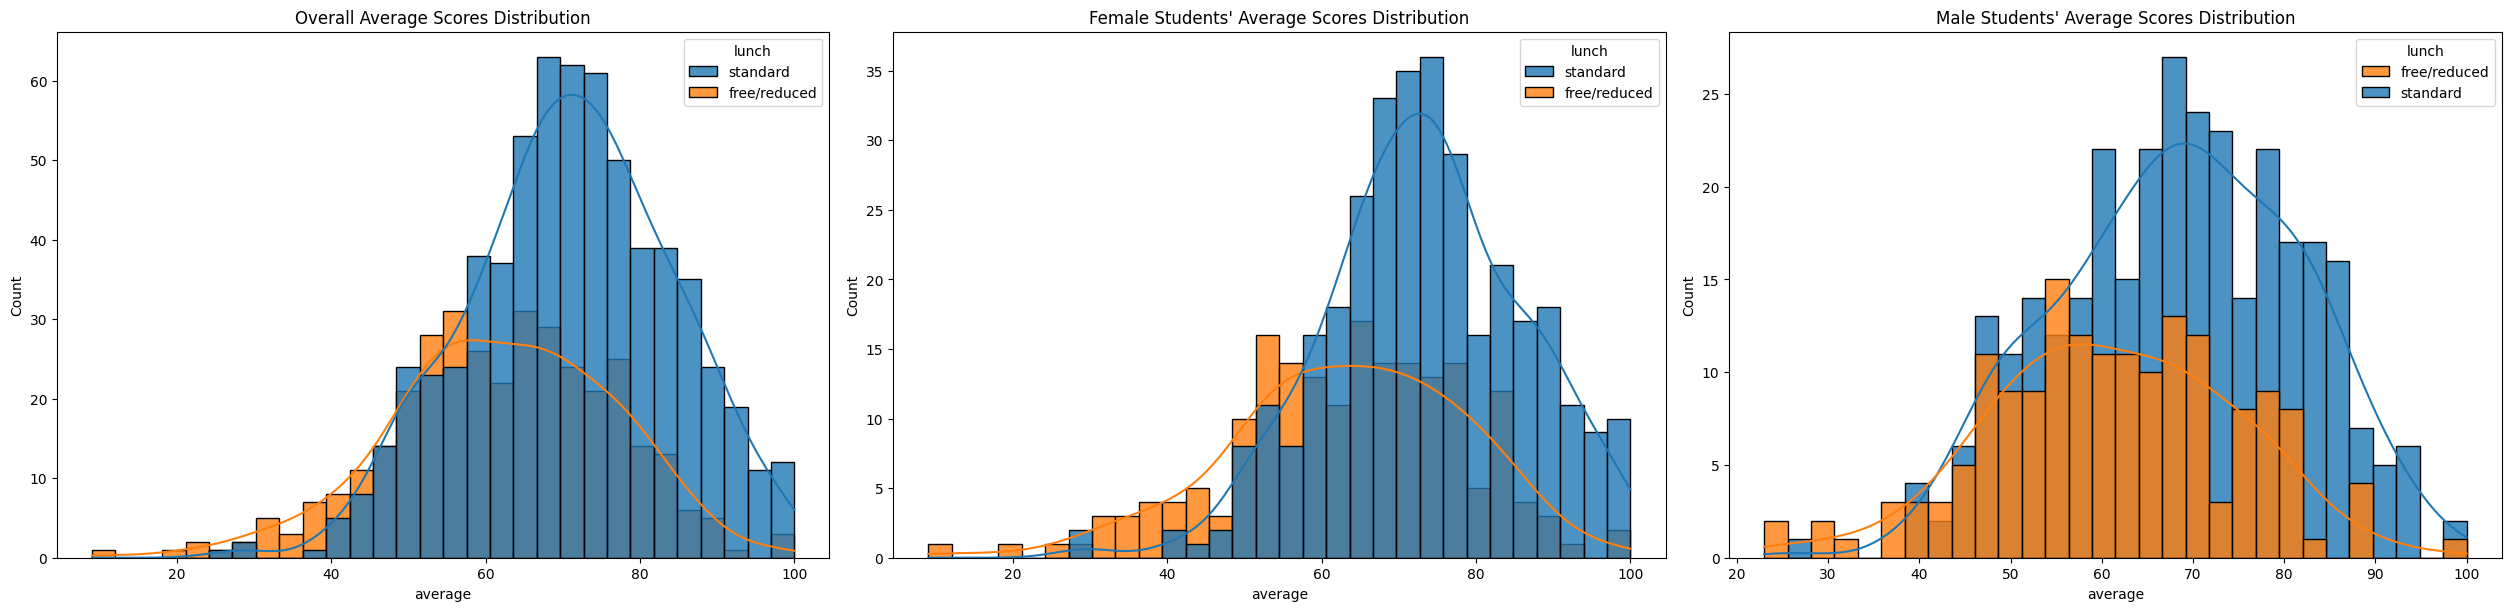

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a larger figure size
fig, axes = plt.subplots(1, 3, figsize=(25, 6), constrained_layout=True)

# Define custom colors for clarity
colors = {'standard': '#1f77b4', 'free/reduced': '#ff7f0e'}  # Blue & Orange

# Overall distribution
sns.histplot(data=df, x='average', bins=30, kde=True, hue='lunch', 
             palette=colors, ax=axes[0], alpha=0.8)
axes[0].set_title("Overall Average Scores Distribution")

# Female students
sns.histplot(data=df[df.gender == 'female'], x='average', bins=30, kde=True, hue='lunch', 
             palette=colors, ax=axes[1], alpha=0.8)
axes[1].set_title("Female Students' Average Scores Distribution")

# Male students
sns.histplot(data=df[df.gender == 'male'], x='average', bins=30, kde=True, hue='lunch', 
             palette=colors, ax=axes[2], alpha=0.8)
axes[2].set_title("Male Students' Average Scores Distribution")

# Show the plots
plt.show()


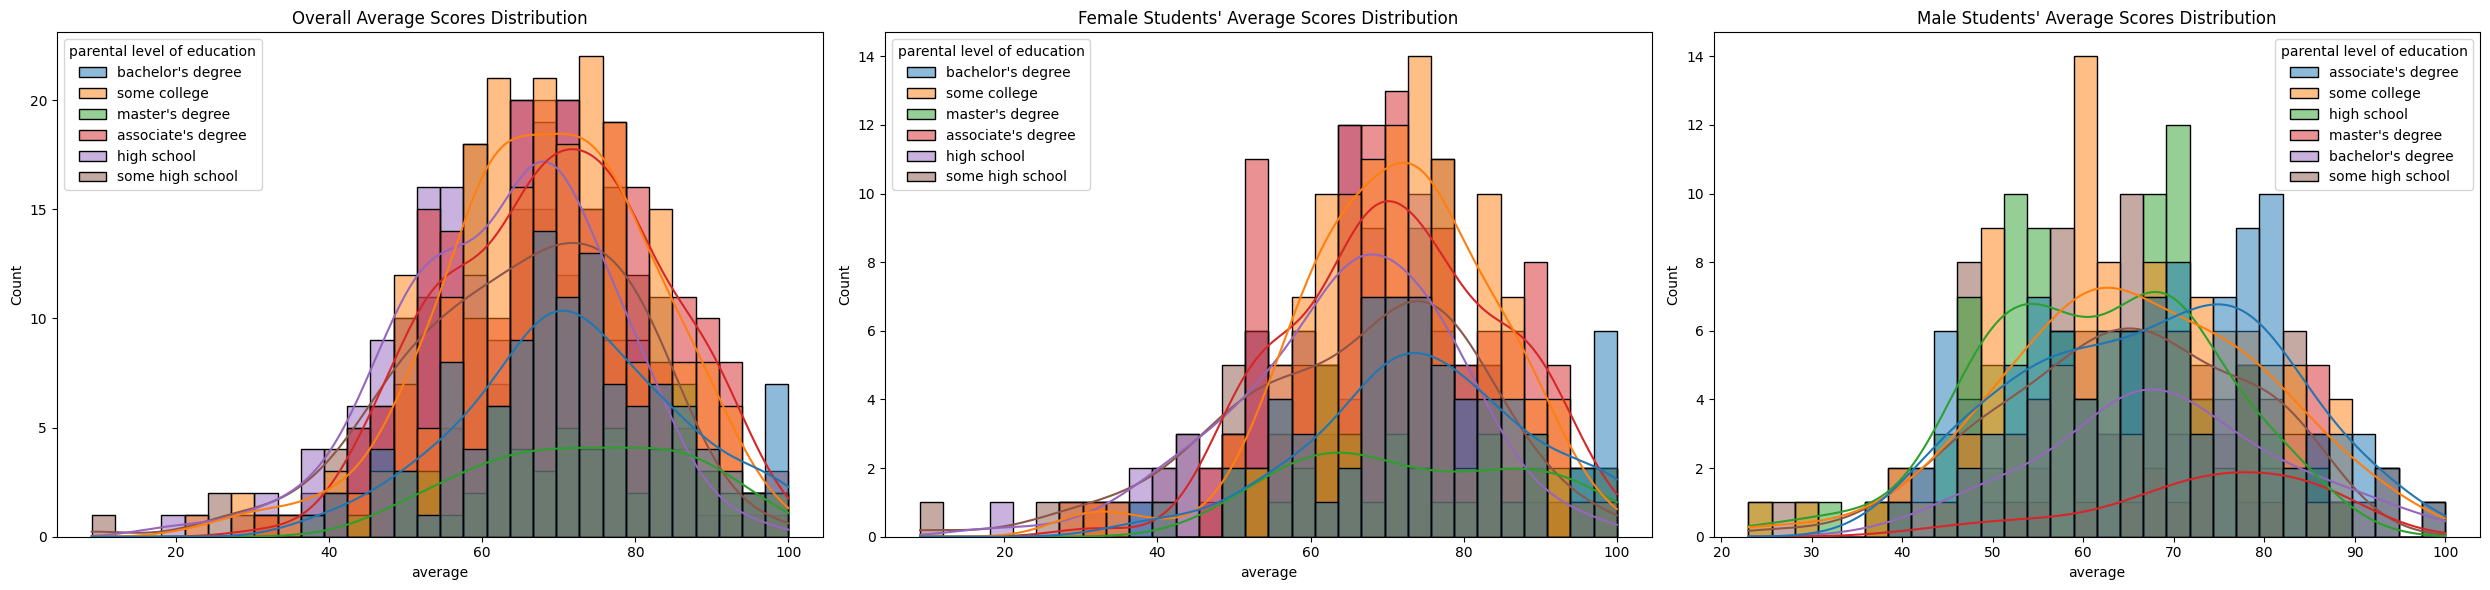

In [38]:

fig, axis = plt.subplots(1, 3, figsize=(25, 6))  # 1 row, 3 columns of subplots

# First subplot: Overall average scores
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', hue='parental level of education', ax=axis[0])
axis[0].set_title("Overall Average Scores Distribution")

# Second subplot: Female students
sns.histplot(data=df[df.gender == 'female'], x='average', bins=30, kde=True, hue='parental level of education', ax=axis[1])
axis[1].set_title("Female Students' Average Scores Distribution")

# Third subplot: Male students
sns.histplot(data=df[df.gender == 'male'], x='average', bins=30, kde=True, hue='parental level of education', ax=axis[2])
axis[2].set_title("Male Students' Average Scores Distribution")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


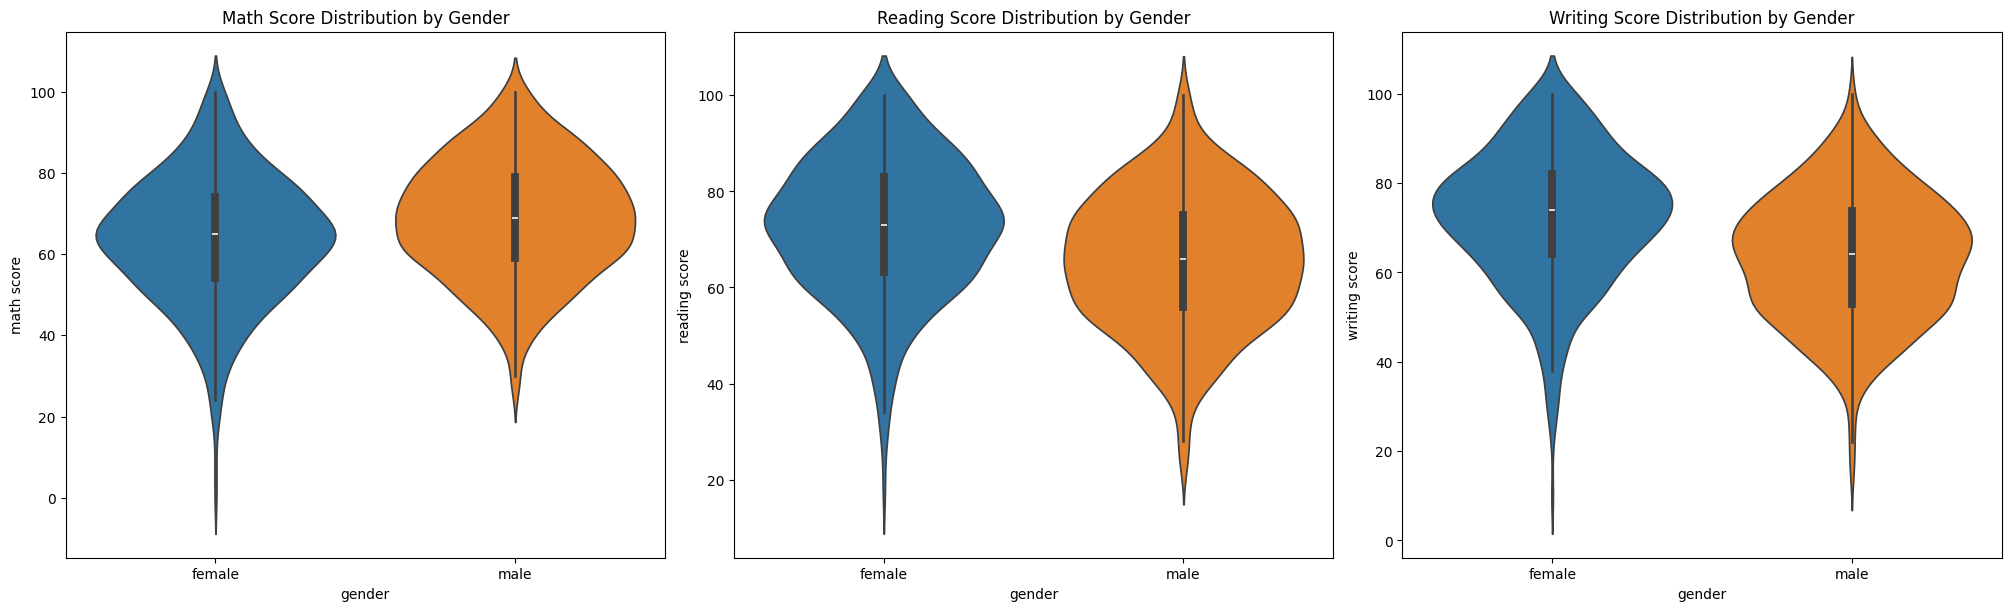

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
fig, axes = plt.subplots(1, 3, figsize=(20, 6), constrained_layout=True)

# Define color palette
colors = ["#1f77b4", "#ff7f0e"]  # Blue & Orange

# Math Score Distribution
sns.violinplot(data=df, x='gender', y='math score', palette=colors, ax=axes[0])
axes[0].set_title("Math Score Distribution by Gender")

# Reading Score Distribution
sns.violinplot(data=df, x='gender', y='reading score', palette=colors, ax=axes[1])
axes[1].set_title("Reading Score Distribution by Gender")

# Writing Score Distribution
sns.violinplot(data=df, x='gender', y='writing score', palette=colors, ax=axes[2])
axes[2].set_title("Writing Score Distribution by Gender")

# Show plots
plt.show()


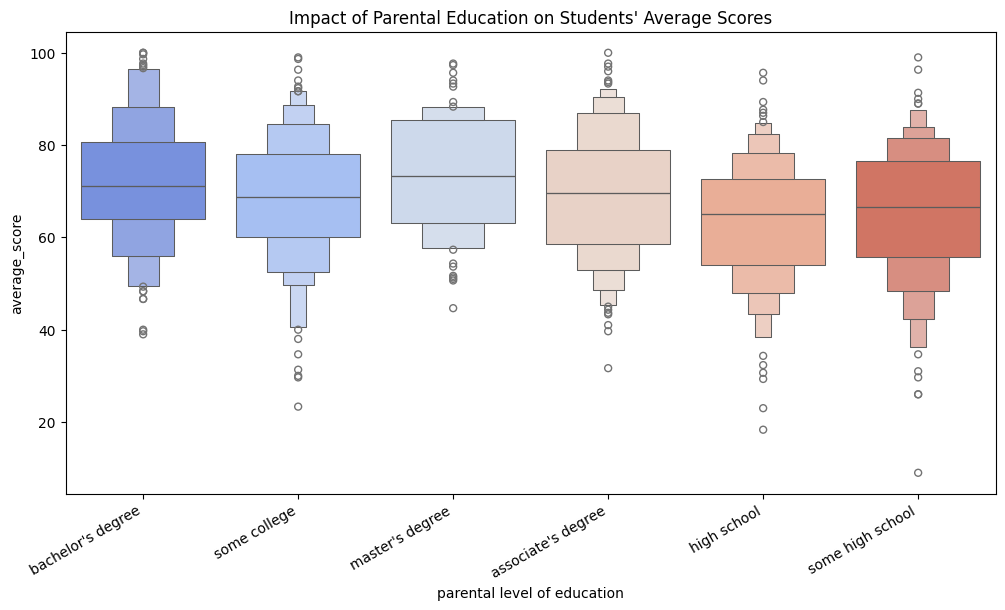

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average score
df["average_score"] = (df["math score"] + df["reading score"] + df["writing score"]) / 3

# Set figure size
plt.figure(figsize=(12, 6))

# Create boxen plot
sns.boxenplot(data=df, x="parental level of education", y="average_score", palette="coolwarm")

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, ha='right')

# Add title
plt.title("Impact of Parental Education on Students' Average Scores")

# Show plot
plt.show()


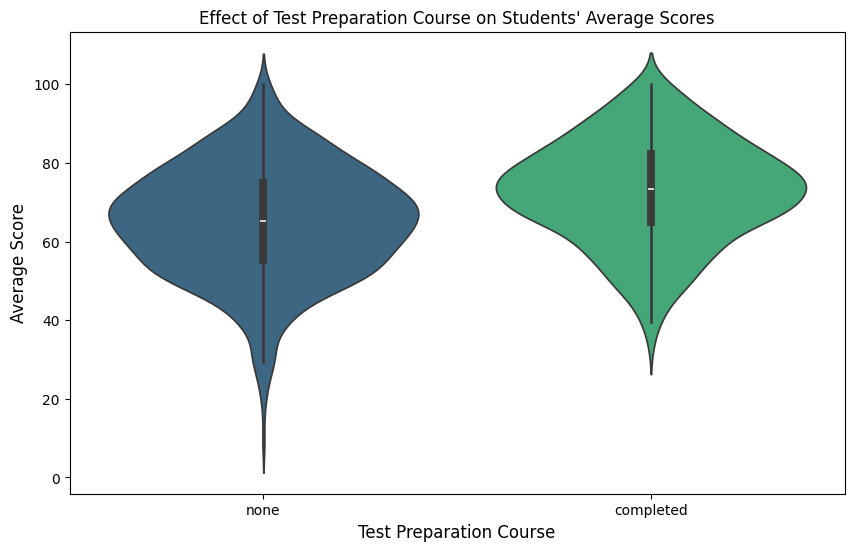

In [46]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="test preparation course", y="average_score", palette='viridis')
plt.title("Effect of Test Preparation Course on Students' Average Scores")
plt.xlabel("Test Preparation Course", fontsize=12)
plt.ylabel("Average Score", fontsize=12)
plt.show()

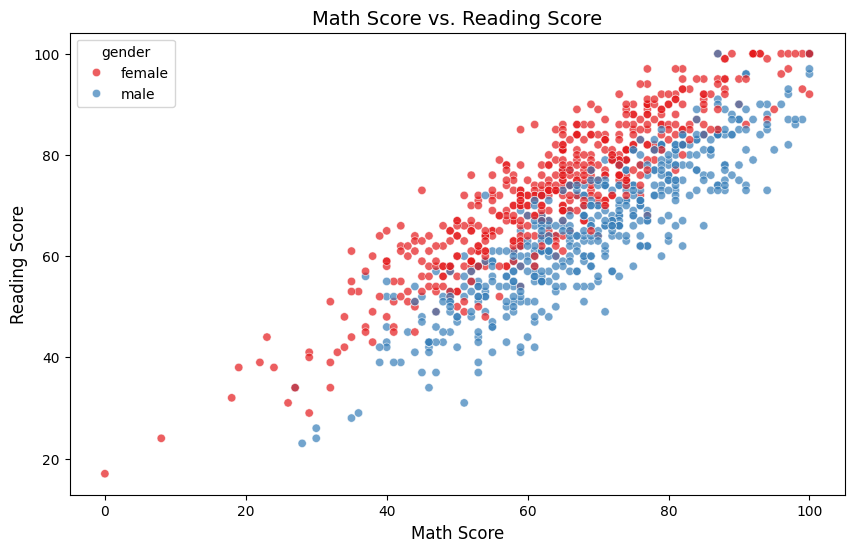

In [50]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="math score", y="reading score", hue="gender", palette="Set1", alpha=0.7)
plt.title("Math Score vs. Reading Score", fontsize=14)
plt.xlabel("Math Score", fontsize=12)
plt.ylabel("Reading Score", fontsize=12)
plt.show()


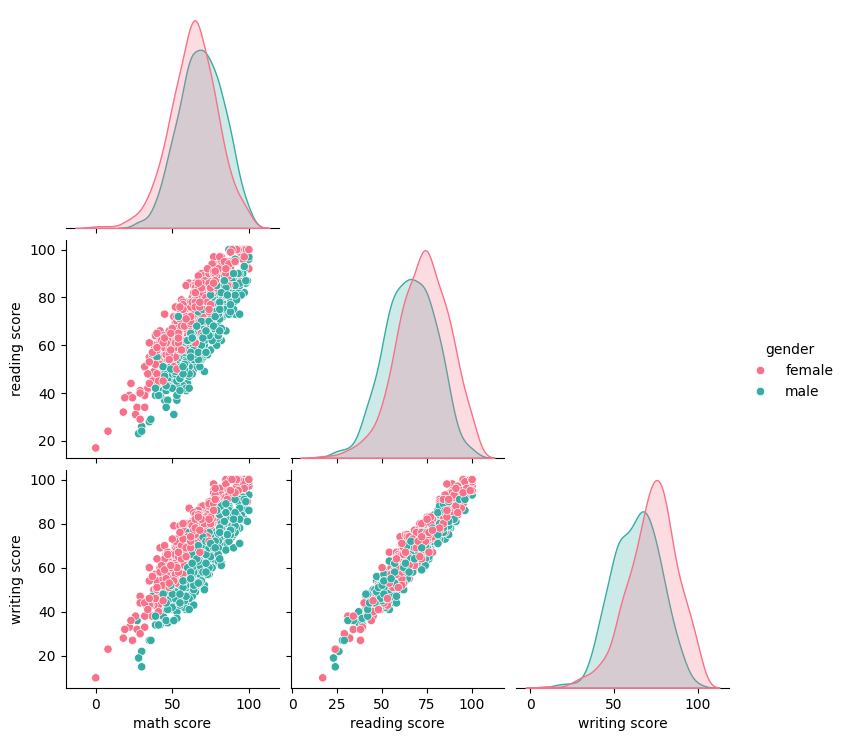

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant features for visualization
features = ["math score", "reading score", "writing score"]
hue_feature = "gender"  # Differentiate by gender

# Create the pair plot
sns.pairplot(df, vars=features, hue=hue_feature, palette="husl", diag_kind="kde", corner=True)

# Show the plot
plt.show()
